# Práctica 0: Python. Integrales por el método de Monte Carlo.
Realizada por:
- Jaime Benedí
- Miguel Sevilla

Dada una función f(x) positiva en el intervalo x pertenece a [a; b] cuyo valor máximo es M dentro de ese intervalo, podemos definir un rectángulo de área (b-a) x M como el que se muestra en la figura para el intervalo [0; 2]. El método de Monte Carlo para el cálculo de la integral consiste en generar aleatoriamente puntos (en rojo en la figura) dentro de ese rectángulo y aproximar el valor de la integral por el porcentaje de puntos que caen por debajo de la función en cuestión:

$$I\simeq \frac{N_{debajo}}{N_{total}}*(b-a)*M$$

Donde $N_{debajo}$ es el número de puntos (x,y) generados aleatoriamente cuya coordenada y es menor que el valor de la función f(x) para ese valor de x y $N_{total}$ es el número de puntos generados aleatoriamente dentro del rectángulo.

Implementa en Python una función con la siguiente cabecera:

```python
def integra_mc(fun, a, b, num_puntos=10000)
```
que calcule la integral de fun entre a y b por el método de Monte Carlo antes descrito, generando para ello num_puntos aleatoriamente. Puedes comprobar la corrección del resultado obtenido comparándolo con aquel tras aplicar la función $scipy.integrate.quad$ de Python.

Se debe implementar dos versiones del algoritmo:
1. Una iterativa que realice num_puntos iteraciones para calcular el resultado
2. Otra que use recursos vectorizados en lugar de bucles

Compara los tiempos de ejecución de ambas implementaciones.

## Recursos usados

In [56]:
# para la generación de arrays en coste menor que lineal
from numpy import linspace, vectorize, max as numpyMax, min as numpyMin, sum as numpySum

# para generar arrays de valores aleatorios
from numpy.random import uniform as unifVector

# para la función objetivo
from scipy.integrate import quad

# para la construcción de gráficas
import matplotlib.pyplot as graph

# para generar un valor aleatorio
from random import uniform

# para procesar el tiempo de ejecución de las funciones
from time import process_time

## Funciones de impresión de las gráficas
Se comentará por encima la implementación de estas funciones, dado que no es el objetivo principal.

In [57]:
def print_func_mc(func, xCrosses, yCrosses, a : float, b : float, num_puntos : int) -> None :
    """Función que genera el gráfico con la función y los puntos generados

    Args:
        func (_type_): funcion de computo
        xCrosses (_type_): coordenadas x de los puntos
        yCrosses (_type_): coordenadas y de los puntos
        a (float): intervalo mínimo de integral
        b (float): intervalo máximo de integral
        num_puntos (int): número de puntos para la integración de monte carlo
    """
    graph.figure()
    graph.title(label='Integral de Monte Carlo para puntos', loc='center')
    
    # Dibujamos la función
    ordenadas = linspace(a, b, num_puntos)
    graph.plot(ordenadas, vectorize(func)(ordenadas), linestyle='-', linewidth=1.0, color='blue', label='function')
    
    # Dibujamos los dardos como cruces
    graph.scatter(xCrosses, yCrosses, marker='x', c='red', label='darts')

    graph.show()
    graph.close()


## Funciones auxiliares

In [58]:
def launch(funcIntegral, fun, a : float, b : float, num_puntos : int = 10000) -> None:
    """Función que ejecuta el problema así cómo las estadísticas

    Args:
        funcIntegral (_type_): función del problema a evaluar
        fun (_type_): función de cómputo
        a (float): intervalo mínimo de integral
        b (float): intervalo máximo de integral
        num_puntos (int, optional): número de puntos para la integración de monte carlo. Defaults to 10000.
    """
    integral, xs, ys = funcIntegral(fun, a, b, num_puntos)
    print(f"Integral por el método de Monte Carlo: {integral:.4f}")
    print(f"Integral real: {quad(fun, a, b)}")
    print_func_mc(fun, xs, ys, a, b, num_puntos)

## 1. Función iterativa

In [59]:
def integra_mc_iter(
        fun,
        a :float, b : float,
        num_puntos : int = 10000
    ) -> tuple[float, list[float], list[float]] :
    """Calcula la integral por el método de monte carlo con programación iterativa.

    Args:
        fun (_type_): Función (real) que devuelve un float
        a (float): mínimo valor del intervalo sobre el que calcular la función
        b (float): máximo valor del intervalo sobre el que calcular la función
        num_puntos (int, optional): Numero de puntos usados para sacar la integral. Defaults to 10000.

    Returns:
        tuple[float, list[float], list[float]]: Devuelve el resultado de la integral, las coordenadas x de cada punto y las y
    """
    # Array donde guardaremos los dardos
    xs, ys = [], []
    # Numero de puntos por debajo
    dardosDebajo : int = 0
    # Valor maximo y minimo de la función aproximado
    maxAprox = float("-inf")
    minAprox = float("inf")
    # valor de segmentación de AB
    step = (b-a) / num_puntos

    # Calculamos el maximo de la función de manera aproximada y respecto al intervalo de estudio
    for i in range(num_puntos):
        maxAprox = max(maxAprox, fun(a + step*i))
        minAprox = min(minAprox, fun(a + step*i))

    # Generamos y situamos los puntos
    for i in range(num_puntos) :
        x, y = uniform(a, b), uniform(minAprox, maxAprox)

        if (fun(x) >= y) :
            dardosDebajo += 1

        # operacion de concatenado de listas
        xs += [x]
        ys += [y]

    # Calculo de la integral
    integral = (dardosDebajo / num_puntos) * (b - a) * maxAprox

    return integral, xs, ys

Integral por el método de Monte Carlo: 9.2537
Integral real: (9.000000000000002, 9.992007221626411e-14)


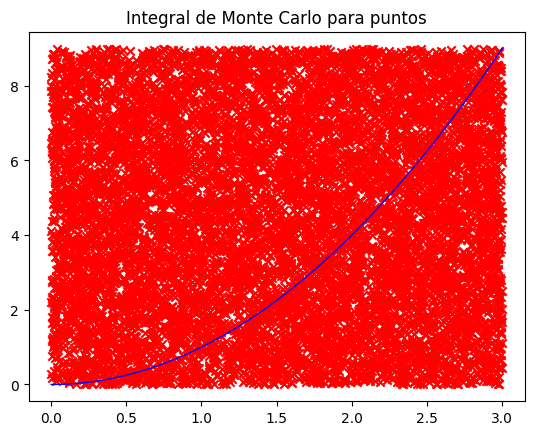

In [60]:
launch(integra_mc_iter, (lambda x: x**2) , 0, 3)

In [61]:
def integra_mc_vect(
        fun,
        a: float, b: float,
        num_puntos : int = 10000
    ) -> tuple[float, list[float], list[float]] :
    """Calcula la integral por el método de monte carlo con programación vectorial.

    Args:
        fun (_type_): Función (real) que devuelve un float
        a (float): mínimo valor del intervalo sobre el que calcular la función
        b (float): máximo valor del intervalo sobre el que calcular la función
        num_puntos (int, optional): Numero de puntos usados para sacar la integral. Defaults to 10000.

    Returns:
        tuple[float, list[float], list[float]]: Devuelve el resultado de la integral, las coordenadas x de cada punto y las y
    """
    x = unifVector(a, b, num_puntos)
    xImage = vectorize(fun)(x)
    maxAprox = numpyMax(xImage)
    y = unifVector(numpyMin(xImage), maxAprox, num_puntos)

    return (numpySum(y <= xImage) / num_puntos) * (b - a) * maxAprox, x, y

Integral por el método de Monte Carlo: 8.9932
Integral real: (9.000000000000002, 9.992007221626411e-14)


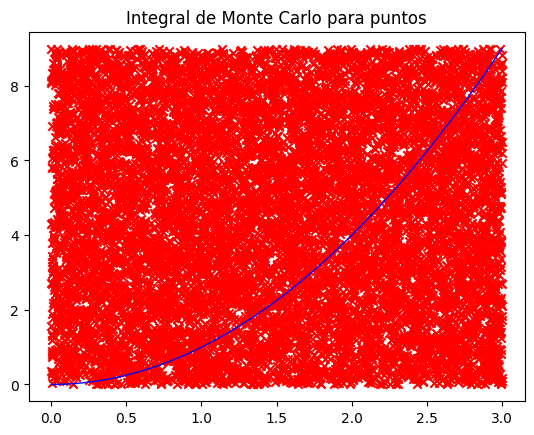

In [62]:
launch(integra_mc_vect, (lambda x: x**2), 0, 3)

In [63]:
def functions_execution_time_comparator(
        funV, funI,
        computeFunction,
        a: float, b: float,
        minPopulation: int = 100,
        maxPopulation : int = 100000,
        numPopulations : int = 20
    )-> None:
    """Evalua dos funciones que realizan el mismo cómputo de una integral, pero implementadas de distinta
    forma: una vectorizada y otra iterativa. Calcula los tiempos de ejecución y los muestra en una gráfica. La
    comparativa se hace respecto a los mismos parámetros: mismo número de puntos, mismo intervalo y misma función

    Args:
        funV (_type_): función de procesado vectorizada
        funI (_type_): función de procesado iterativa
        computeFunction (_type_): función de cómputo que devuelve float_like
        a (float): mínimo del intervalo a integrar sobre computeFunction
        b (float): máximo del intervalo a integrar sobre computeFunction
        minPopulation (int, optional): tamaño mínimo de puntos a evaluar. Defaults to 100.
        maxPopulation (int, optional): tamaño máximo de puntos a evaluar. Defaults to 100000.
        numPopulations (int, optional): número total de poblaciones de puntos a evaluar. Defaults to 20.
    """
    sizes = linspace(minPopulation, maxPopulation, numPopulations, dtype=int)

    timesV, timesI = [], []

    for size in sizes:
        # tiempo de la función vectorizada
        tic = process_time()
        funV(computeFunction, a, b, size)
        timesV += [1000 * (process_time() - tic)]

        # tiempo de la función iterativa
        tic = process_time()
        funI(computeFunction, a, b, size)
        timesI += [1000 * (process_time() - tic)]

    # Construcción del grafo
    graph.figure()
    graph.title("Tiempos de ejecución entre funciones", loc='center')
    graph.scatter(sizes, timesI, c='red', label='bucle')
    graph.scatter(sizes, timesV, c='blue', label='vector')
    graph.xlabel("Tamaño de población", loc='center')
    graph.ylabel("Tiempo (s)", loc='center')
    graph.legend()
    graph.show()
    graph.close()

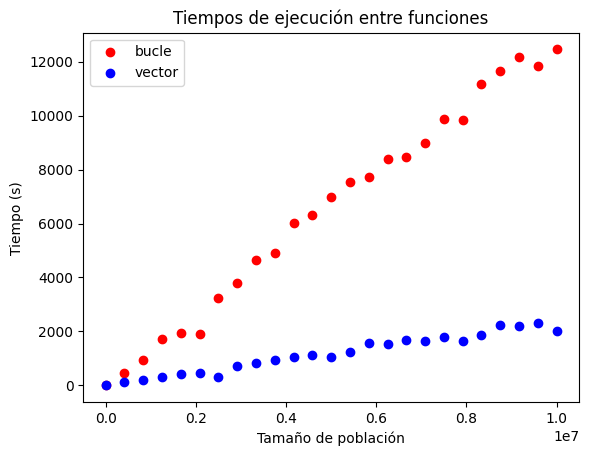

In [65]:
func = (lambda x: x**2)
a = 0.0
b = 3.0
minSize = 10
maxSize = 10000000
numIters = 25
functions_execution_time_comparator(integra_mc_vect, integra_mc_iter, func, a, b, minSize, maxSize, numIters)